# Segment a point cloud using a shapefile

In [1]:
import numpy as np 
import matplotlib.pyplot as plt


import cloudComPy as cc # cloud compare python interface.
if cc.isPluginCanupo():
    import cloudComPy.Canupo

if cc.isPluginPCL():
    import cloudComPy.PCL
from osgeo import gdal, ogr, osr
from subprocess import run

from tqdm import tqdm

import json
import os 
from yaml import load
from yaml.loader import Loader

from helpers.utils import plot_segmentation_scheme

In [2]:
caveName = "15_CotepatiereCocaliere"
root = f"../../real_data/{caveName}"


PROCESSING_FILEPATH = os.path.join(root, "params.yaml")
p = load(open(PROCESSING_FILEPATH), Loader)

In [3]:
GLOBAL_SHIFT = p["alignment"]["globalShift"]

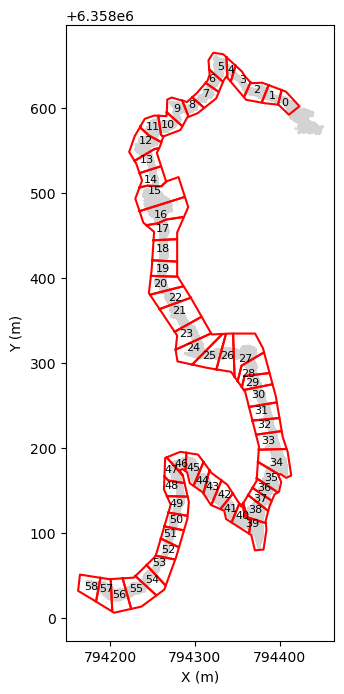

In [4]:
fig, ax = plt.subplots(figsize = (15, 8))

ax, res = plot_segmentation_scheme(root, ax)
plt.xlabel("X (m)")
plt.ylabel("Y (m)")
ax.set_aspect("equal")
plt.savefig(os.path.join(root, "output/SegmentationScheme.png"), dpi = 300)
plt.show()

In [5]:
GEOREF_CLOUD_FILEPATH = os.path.normpath(os.path.join(p["paths"]["root"], p["paths"]["georefOutCloudName"]))

print(GEOREF_CLOUD_FILEPATH)
cloud = cc.loadPointCloud(GEOREF_CLOUD_FILEPATH,  cc.CC_SHIFT_MODE.XYZ, 0, *GLOBAL_SHIFT)

F:\ScanLeica\from_pointcloud_to_mesh\real_data\15_CotepatiereCocaliere\output\CotepatiereCocaliere_georef.las


In [6]:
trans = np.identity(4)

In [7]:
trans[1,3] = -6538700 +6358700

In [8]:
matrix_as_str = " "
for line in trans:
    for elem in line:
        matrix_as_str += f"{elem} "
    matrix_as_str +="\n"

matrix_as_str

' 1.0 0.0 0.0 0.0 \n0.0 1.0 0.0 -180000.0 \n0.0 0.0 1.0 0.0 \n0.0 0.0 0.0 1.0 \n'

In [9]:
translation = cc.ccGLMatrix.fromString(matrix_as_str)

In [10]:
#cloud.applyRigidTransformation(translation)

In [11]:
cc_polylines = res[0]

In [12]:
CloudCropZ = cloud.crop2D(cc_polylines[0], 2, True) # 2 means that the viewing direction is parallel to Z axis and cropping is done from top view accordingly. 

In [13]:
cloud.getOwnBB().maxCorner()


(-150.06100463867188, -37.5, 6.099999904632568)

In [14]:
cc_polylines[6].getBoundingBox()

[(-287.3499755859375, -80.70503234863281, 1800.0),
 (-266.8941345214844, -54.224056243896484, 1800.0)]

In [15]:
# cycle through each polyline and cut the cloud, then save to a new ply file.  
for c, polyline in tqdm(enumerate(cc_polylines), total = len(cc_polylines)): 
    if c > 29:
        print(c, polyline.getBoundingBox())
        # crop the cloud using the polyline, only leave stuff inside. 
        CloudCropZ = cloud.crop2D(polyline, 2, True) # 2 means that the viewing direction is parallel to Z axis and cropping is done from top view accordingly. 
        ret = cc.SavePointCloud(CloudCropZ, f"../../real_data/{caveName}/process/cropped_clouds/Cropped_{c}.ply")

 53%|███████████████████████████████████████████                                       | 31/59 [00:58<00:52,  1.88s/it]

30 [(-242.3713836669922, -451.5531311035156, 1800.0), (-203.5117950439453, -424.824462890625, 1800.0)]
31 [(-236.33473205566406, -467.58929443359375, 1800.0), (-200.391357421875, -446.17230224609375, 1800.0)]


 54%|████████████████████████████████████████████▍                                     | 32/59 [01:42<01:41,  3.76s/it]

32 [(-232.2806396484375, -484.233154296875, 1800.0), (-197.79876708984375, -464.6304931640625, 1800.0)]


 56%|█████████████████████████████████████████████▊                                    | 33/59 [02:28<02:42,  6.24s/it]

33 [(-228.0729217529297, -501.8946533203125, 1800.0), (-191.92630004882812, -479.96630859375, 1800.0)]


 59%|████████████████████████████████████████████████▋                                 | 35/59 [04:49<07:00, 17.50s/it]

34 [(-225.81634521484375, -535.0891723632812, 1800.0), (-186.55694580078125, -501.0476379394531, 1800.0)]
35 [(-227.19439697265625, -552.2374267578125, 1800.0), (-198.37673950195312, -516.2614135742188, 1800.0)]


 63%|███████████████████████████████████████████████████▍                              | 37/59 [06:57<10:41, 29.18s/it]

36 [(-232.22360229492188, -562.1788330078125, 1800.0), (-202.39112854003906, -535.5542602539062, 1800.0)]
37 [(-237.34588623046875, -574.1473999023438, 1800.0), (-209.45486450195312, -546.785888671875, 1800.0)]


 64%|████████████████████████████████████████████████████▊                             | 38/59 [07:49<11:40, 33.34s/it]

38 [(-243.11805725097656, -588.4822387695312, 1800.0), (-213.6837921142578, -555.2888793945312, 1800.0)]


 68%|███████████████████████████████████████████████████████▌                          | 40/59 [10:20<15:59, 50.49s/it]

39 [(-243.87710571289062, -620.4768676757812, 1800.0), (-215.7667694091797, -564.8707275390625, 1800.0)]
40 [(-256.8692321777344, -600.862548828125, 1800.0), (-234.24366760253906, -565.39697265625, 1800.0)]


 73%|███████████████████████████████████████████████████████████▊                      | 43/59 [13:22<14:41, 55.08s/it]

41 [(-269.9941101074219, -587.663818359375, 1800.0), (-247.76007080078125, -553.5375366210938, 1800.0)]
42 [(-280.7867431640625, -571.8527221679688, 1800.0), (-255.27658081054688, -538.0635375976562, 1800.0)]


 76%|██████████████████████████████████████████████████████████████▌                   | 45/59 [15:17<13:07, 56.24s/it]

43 [(-289.93817138671875, -567.1466064453125, 1800.0), (-268.70294189453125, -526.0025024414062, 1800.0)]
44 [(-301.61175537109375, -553.5530395507812, 1800.0), (-282.818359375, -516.3726806640625, 1800.0)]
45 [(-311.23370361328125, -544.5282592773438, 1800.0), (-289.8802490234375, -505.52935791015625, 1800.0)]


 78%|███████████████████████████████████████████████████████████████▉                  | 46/59 [16:20<12:36, 58.16s/it]

46 [(-333.33135986328125, -532.4737548828125, 1800.0), (-310.046875, -504.40753173828125, 1800.0)]


 81%|██████████████████████████████████████████████████████████████████▋               | 48/59 [18:25<10:59, 59.97s/it]

47 [(-335.87872314453125, -541.3248901367188, 1800.0), (-312.1370544433594, -510.96051025390625, 1800.0)]
48 [(-336.4779968261719, -557.1546630859375, 1800.0), (-308.5581359863281, -533.3253173828125, 1800.0)]


 83%|████████████████████████████████████████████████████████████████████              | 49/59 [19:21<09:46, 58.68s/it]

49 [(-332.9688415527344, -579.78271484375, 1800.0), (-307.13232421875, -556.58251953125, 1800.0)]


 85%|█████████████████████████████████████████████████████████████████████▍            | 50/59 [20:16<08:37, 57.49s/it]

50 [(-335.97027587890625, -596.938720703125, 1800.0), (-308.6161193847656, -575.9552001953125, 1800.0)]


 86%|██████████████████████████████████████████████████████████████████████▉           | 51/59 [21:05<07:19, 54.98s/it]

51 [(-340.1794128417969, -616.8680419921875, 1800.0), (-312.91009521484375, -592.1558227539062, 1800.0)]


 88%|████████████████████████████████████████████████████████████████████████▎         | 52/59 [21:47<05:59, 51.30s/it]

52 [(-346.10321044921875, -631.241455078125, 1800.0), (-318.7430419921875, -606.5012817382812, 1800.0)]


 90%|█████████████████████████████████████████████████████████████████████████▋        | 53/59 [22:35<05:01, 50.27s/it]

53 [(-356.9532775878906, -661.9908447265625, 1800.0), (-323.1863098144531, -626.6906127929688, 1800.0)]


 93%|████████████████████████████████████████████████████████████████████████████▍     | 55/59 [24:11<03:15, 48.93s/it]

54 [(-370.08367919921875, -673.5286254882812, 1800.0), (-334.39404296875, -637.7673950195312, 1800.0)]
55 [(-385.1518859863281, -689.360107421875, 1800.0), (-345.28387451171875, -650.7128295898438, 1800.0)]


 95%|█████████████████████████████████████████████████████████████████████████████▊    | 56/59 [25:04<02:30, 50.20s/it]

56 [(-399.15899658203125, -693.8863525390625, 1800.0), (-375.0274963378906, -653.4081420898438, 1800.0)]


 98%|████████████████████████████████████████████████████████████████████████████████▌ | 58/59 [26:44<00:50, 50.16s/it]

57 [(-416.4450378417969, -692.5890502929688, 1800.0), (-397.2812805175781, -652.7791748046875, 1800.0)]
58 [(-437.55755615234375, -680.8170166015625, 1800.0), (-411.2090759277344, -648.9620971679688, 1800.0)]


100%|██████████████████████████████████████████████████████████████████████████████████| 59/59 [27:31<00:00, 27.99s/it]
